<a href="https://colab.research.google.com/github/BrandonVazquez99/IA/blob/main/Dogs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unrar x Perros_y_Gatos.rar

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base_dir = 'Perros y Gatos'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

In [ ]:
train_gatos_dir = os.path.join(train_dir,'gatos')
train_perros_dir = os.path.join(train_dir,'perros')

validation_gatos_dir = os.path.join(validation_dir,'gatos')
validation_perros_dir = os.path.join(validation_dir,'perros')

test_gatos_dir = os.path.join(test_dir,'gatos')
test_perros_dir = os.path.join(test_dir,'perros')

In [ ]:
len(os.listdir(train_perros_dir))

1000

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from IPython.core.display import Image
from keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator (rescale=1. / 255)
val_data = ImageDataGenerator (rescale=1. / 255)
test_data = ImageDataGenerator (rescale=1. / 255)

In [ ]:
training_set = train_data.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=20,
    class_mode = 'binary'
    )
validation_set=val_data.flow_from_directory(
    validation_dir,
    target_size=(64,64),
    batch_size=20,
    class_mode = 'binary'
    )
test_set = test_data.flow_from_directory(
    test_dir,
    target_size=(64,64),
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [ ]:
from keras import optimizers

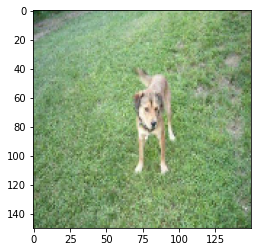

In [ ]:
from keras.utils import load_img
fnames = [os.path.join(train_perros_dir,fname) for
          fname in os.listdir(train_perros_dir)]
img_path = fnames [79]
img = load_img (img_path,target_size=(150,150))

plt.figure()
imgplot=plt.imshow(img)
plt.show()

In [ ]:
#Construimos la red Convolucional
from keras.engine import sequential
red = Sequential()
red.add(Conv2D(32,(3,3),input_shape=(64,64,3), activation='relu'))
red.add(MaxPooling2D(2,2))
red.add(Conv2D(64,(3,3), activation='relu'))
red.add(MaxPooling2D(2,2))
red.add(Conv2D(128,(2,2),activation='relu'))
red.add(MaxPooling2D(2,2))
red.add(Conv2D(128,(2,2),activation='relu'))
red.add(MaxPooling2D(2,2))
red.add(Flatten())
red.add(Dense(units=512,activation='relu'))
red.add(Dense(units=1, activation='sigmoid'))

In [ ]:
red.summary()

In [ ]:
red.compile(loss='binary_crossentropy',
            optimizer='rmsprop',
            metrics=['accuracy','mse'])

In [ ]:
history = red.fit(training_set,
                 steps_per_epoch=100,
                 epochs=30,
                 batch_size=50,
                 validation_data=validation_set,
                 validation_steps=50)

Epoch 1/30
100/100 [==============================] - 18s 98ms/step - loss: 0.6994 - accuracy: 0.4930 - mse: 0.2528 - val_loss: 0.6915 - val_accuracy: 0.5050 - val_mse: 0.2492
Epoch 2/30
100/100 [==============================] - 11s 109ms/step - loss: 0.6901 - accuracy: 0.5400 - mse: 0.2485 - val_loss: 0.6643 - val_accuracy: 0.6270 - val_mse: 0.2357
Epoch 3/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6668 - accuracy: 0.5995 - mse: 0.2365 - val_loss: 0.6819 - val_accuracy: 0.5490 - val_mse: 0.2447
Epoch 4/30
100/100 [==============================] - 8s 80ms/step - loss: 0.6483 - accuracy: 0.6275 - mse: 0.2272 - val_loss: 0.6255 - val_accuracy: 0.6530 - val_mse: 0.2176
Epoch 5/30
100/100 [==============================] - 10s 104ms/step - loss: 0.6136 - accuracy: 0.6690 - mse: 0.2123 - val_loss: 0.6177 - val_accuracy: 0.6710 - val_mse: 0.2137
Epoch 6/30
100/100 [==============================] - 8s 79ms/step - loss: 0.5698 - accuracy: 0.7155 - mse: 0.1928 - val

<function matplotlib.pyplot.show(*args, **kw)>

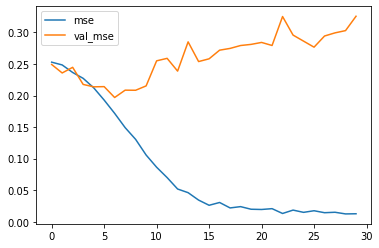

In [ ]:
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.legend()
plt.show

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=4,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
training_set.class_indices

{'gatos': 0, 'perros': 1}

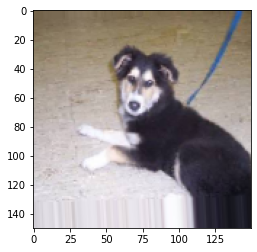

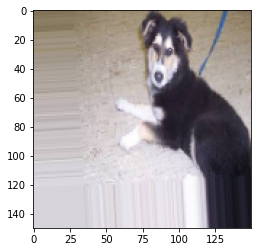

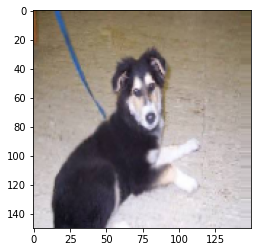

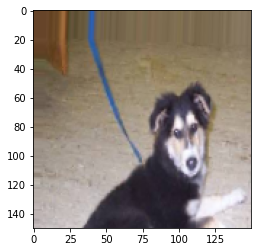

In [ ]:
img =load_img(fnames[15], target_size=(150,150))
x= np.array(img)
x = x.reshape((1,)+ x.shape)

i=0

for gen in datagen.flow(x,batch_size=1):
  plt.figure()
  imgplot = plt.imshow(gen[0])
  plt.show()
  i +=1
  if i % 4 == 0:
    break 
                         

In [ ]:
training_set = datagen.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [ ]:
predict_set = red.predict(test_set)

1/1 [==============================] - 0s 190ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
red.evaluate(test_set)

1/1 [==============================] - 0s 36ms/step - loss: 0.0108 - accuracy: 1.0000 - mse: 2.2824e-04


[0.01079836767166853, 1.0, 0.00022823514882475138]

In [ ]:
predict_set.reshape(1,-1)

array([[9.7863483e-01, 7.8558884e-09]], dtype=float32)

In [ ]:
y_test=np.int64(test_set[0][1].reshape(-1,1))

In [ ]:
y_pred = np.int64(test_set[0][1].reshape(-1,1))

In [ ]:
y_pred

array([[1],
       [0]])

In [ ]:
y_test

array([[1],
       [0]])

In [ ]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1, 0],
       [0, 1]])

In [ ]:
red.save("RedCNN_PerrosyGatos.h5")

In [ ]:
nueva_red = keras.models.load_model("RedCNN_PerrosyGatos.h5")

In [ ]:
path = "Perros y Gatos/validation/gatos/cat.1050.jpg"
from keras.utils import load_img, img_to_array
img = load_img(path,target_size=(64,64))
img_tensor=img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /= 255
print(img_tensor.shape)

(1, 64, 64, 3)


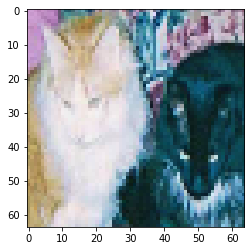

In [ ]:
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
animal = nueva_red.predict(img_tensor)

1/1 [==============================] - 0s 140ms/step


In [ ]:
if np.round(animal[0][0]) == 1:
  print("Perro")
else:
    print("Gato")

Perro
